<a href="https://colab.research.google.com/github/zainmorshed/child_transportation_injuries_and_fatalities_analysis/blob/main/ZainM_Injury_Hotspot_Mappable_Identifying_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/2023-12-30 All Together Mappable Only (2).xlsx')

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(columns=['ID'], inplace=True)

In [ ]:
df_copy.head()

,age,race,gender,address,lat,lon,SVI,intersectionflag,intersectionrelated,month,year,type,severity
0,17.0,H - HISPANIC,1 - MALE,Gessner Rd,29.80611,-95.5452,0.6433,0.0,NON INTERSECTION,6.0,2019.0,3 - PEDALCYCLIST,K - FATAL INJURY
1,17.0,H - HISPANIC,1 - MALE,I-45,29.71097,-95.3092,0.9307,0.0,NON INTERSECTION,9.0,2019.0,4 - PEDESTRIAN,K - FATAL INJURY
2,16.0,H - HISPANIC,1 - MALE,2652 Greenhouse Rd,29.80159,-95.7039,0.4748,0.0,NON INTERSECTION,6.0,2020.0,3 - PEDALCYCLIST,K - FATAL INJURY
3,10.0,W - WHITE,1 - MALE,10221 Knoboak Dr,29.80778,-95.5462,0.6433,0.0,NON INTERSECTION,9.0,2020.0,3 - PEDALCYCLIST,K - FATAL INJURY
4,14.0,B - BLACK,1 - MALE,9299 Jutland Rd,29.65720,-95.3488,0.9859,1.0,INTERSECTION,4.0,2021.0,98 - OTHER (EXPLAIN IN NARRATIVE),K - FATAL INJURY


In [ ]:
df.drop(index=[471, 472, 473], inplace=True)

In [ ]:
print("Number of instances:",df_copy.shape[0])
print("Number of features:",df_copy.shape[1])
print("\nDatatypes of features:")
print(df_copy.dtypes)

Number of instances: 474
Number of features: 13

Datatypes of features:
age                    float64
race                    object
gender                  object
address                 object
lat                    float64
lon                    float64
SVI                    float64
intersectionflag       float64
intersectionrelated     object
month                  float64
year                   float64
type                    object
severity                object
dtype: object


In [ ]:
print("\nNumber of non-null values in each column:")
print(df_copy.info())


Number of non-null values in each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  471 non-null    float64
 1   race                 471 non-null    object 
 2   gender               471 non-null    object 
 3   address              471 non-null    object 
 4   lat                  471 non-null    float64
 5   lon                  471 non-null    float64
 6   SVI                  471 non-null    float64
 7   intersectionflag     471 non-null    float64
 8   intersectionrelated  471 non-null    object 
 9   month                471 non-null    float64
 10  year                 471 non-null    float64
 11  type                 471 non-null    object 
 12  severity             471 non-null    object 
dtypes: float64(7), object(6)
memory usage: 48.3+ KB
None


In [ ]:
df_copy.tail(5)

,age,race,gender,address,lat,lon,SVI,intersectionflag,intersectionrelated,month,year,type,severity
469,7.0,H - HISPANIC,2 - FEMALE,4700 OXFORD ST,29.833683,-95.392303,0.9883,0.0,NON INTERSECTION,12.0,2023.0,4 - PEDESTRIAN,B - SUSPECTED MINOR INJURY
470,17.0,H - HISPANIC,1 - MALE,W 34TH ST,29.817315,-95.428941,0.5517,0.0,NON INTERSECTION,12.0,2023.0,4 - PEDESTRIAN,B - SUSPECTED MINOR INJURY
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop last 3 rows

In [ ]:
df_copy.drop(index=[471, 472, 473], inplace=True)

Descriptive Statistics

In [ ]:
df_copy.describe()

,age,lat,lon,SVI,intersectionflag,month,year
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,11.885350,29.751432,-95.423072,0.691254,0.405520,6.768577,2020.363057
std,4.350546,0.106120,0.129801,0.293973,0.491514,3.566921,1.800069
min,1.000000,29.557830,-95.745552,0.001900,0.000000,1.000000,2018.000000
25%,9.000000,29.681476,-95.528253,0.557200,0.000000,4.000000,2019.000000
50%,13.000000,29.727968,-95.429000,0.804600,0.000000,7.000000,2020.000000
75%,15.000000,29.794431,-95.333977,0.917050,1.000000,10.000000,2022.000000
max,17.000000,30.078140,-95.105413,0.998200,1.000000,12.000000,2023.000000


In [ ]:
race = df_copy['race'].unique()
print(race)

['H - HISPANIC' 'W - WHITE' 'B - BLACK' 'A - ASIAN' '99 - UNKNOWN'
 '98 - OTHER' 'I - AMER. INDIAN/ALASKAN NATIVE']


Encoding all features of object type into float to be able to compare and determine any correlation

In [ ]:
race_encoded = {
    'H - HISPANIC': 0,
    'W - WHITE': 1,
    'B - BLACK': 2,
    'A - ASIAN': 3,
    '99 - UNKNOWN': 4,
    '98 - OTHER': 5,
    'I - AMER. INDIAN/ALASKAN NATIVE': 6
}

df_copy['Race Encoded'] = df_copy['race'].map(race_encoded)
print(df_copy[['race', 'Race Encoded']])

             race  Race Encoded
0    H - HISPANIC             0
1    H - HISPANIC             0
2    H - HISPANIC             0
3       W - WHITE             1
4       B - BLACK             2
..            ...           ...
466     B - BLACK             2
467     W - WHITE             1
468     B - BLACK             2
469  H - HISPANIC             0
470  H - HISPANIC             0

[471 rows x 2 columns]


In [ ]:
gender = df_copy['gender'].unique()
print(gender)

['1 - MALE' '2 - FEMALE']


In [ ]:
gender_encoded = {
    '1 - MALE': 0,
    '2 - FEMALE': 1,
}
df_copy['Gender Encoded'] = df_copy['gender'].map(gender_encoded)
print(df_copy[['gender', 'Gender Encoded']])

         gender  Gender Encoded
0      1 - MALE               0
1      1 - MALE               0
2      1 - MALE               0
3      1 - MALE               0
4      1 - MALE               0
..          ...             ...
466  2 - FEMALE               1
467    1 - MALE               0
468  2 - FEMALE               1
469  2 - FEMALE               1
470    1 - MALE               0

[471 rows x 2 columns]


In [ ]:
type = df_copy['type'].unique()
print(type)

['3 - PEDALCYCLIST' '4 - PEDESTRIAN' '98 - OTHER (EXPLAIN IN NARRATIVE)']


In [ ]:
type_encoded = {
    '3 - PEDALCYCLIST': 0,
    '4 - PEDESTRIAN': 1,
    '98 - OTHER (EXPLAIN IN NARRATIVE)': 2
}
df_copy['Type Encoded'] = df_copy['type'].map(type_encoded)
print(df_copy[['type', 'Type Encoded']])

                                  type  Type Encoded
0                     3 - PEDALCYCLIST             0
1                       4 - PEDESTRIAN             1
2                     3 - PEDALCYCLIST             0
3                     3 - PEDALCYCLIST             0
4    98 - OTHER (EXPLAIN IN NARRATIVE)             2
..                                 ...           ...
466                     4 - PEDESTRIAN             1
467                   3 - PEDALCYCLIST             0
468                     4 - PEDESTRIAN             1
469                     4 - PEDESTRIAN             1
470                     4 - PEDESTRIAN             1

[471 rows x 2 columns]


In [ ]:
severity_encoded = df_copy['severity'].unique()
print(severity_encoded)

['K - FATAL INJURY' 'A - SUSPECTED SERIOUS INJURY'
 'B - SUSPECTED MINOR INJURY']


In [ ]:
severity_encoded = {
    'B - SUSPECTED MINOR INJURY': 0,
    'A - SUSPECTED SERIOUS INJURY': 1,
    'K - FATAL INJURY': 2

}
df_copy['Severity Encoded'] = df_copy['severity'].map(severity_encoded)
print(df_copy[['severity', 'Severity Encoded']])

                       severity  Severity Encoded
0              K - FATAL INJURY                 2
1              K - FATAL INJURY                 2
2              K - FATAL INJURY                 2
3              K - FATAL INJURY                 2
4              K - FATAL INJURY                 2
..                          ...               ...
466  B - SUSPECTED MINOR INJURY                 0
467  B - SUSPECTED MINOR INJURY                 0
468  B - SUSPECTED MINOR INJURY                 0
469  B - SUSPECTED MINOR INJURY                 0
470  B - SUSPECTED MINOR INJURY                 0

[471 rows x 2 columns]


In [ ]:
intersectionrelated = df_copy['intersectionrelated'].unique()
print(intersectionrelated)

['NON INTERSECTION' 'INTERSECTION' 'INTERSECTION RELATED'
 'DRIVEWAY ACCESS']


In [ ]:
intersectionrelated_encoded = {
    'NON INTERSECTION': 0,
    'INTERSECTION': 1,
    'INTERSECTION RELATED': 2,
    'DRIVEWAY ACCESS': 3
}
df_copy['Intersection Related Encoded'] = df_copy['intersectionrelated'].map(severity_encoded)
print(df_copy[['intersectionrelated', 'Intersection Related Encoded']])

    intersectionrelated  Intersection Related Encoded
0      NON INTERSECTION                           NaN
1      NON INTERSECTION                           NaN
2      NON INTERSECTION                           NaN
3      NON INTERSECTION                           NaN
4          INTERSECTION                           NaN
..                  ...                           ...
466    NON INTERSECTION                           NaN
467    NON INTERSECTION                           NaN
468    NON INTERSECTION                           NaN
469    NON INTERSECTION                           NaN
470    NON INTERSECTION                           NaN

[471 rows x 2 columns]


In [ ]:
df_copy.drop(columns=['address'], inplace=True)
df_copy.drop(columns=['race'], inplace=True)
df_copy.drop(columns=['gender'], inplace=True)
df_copy.drop(columns=['type'], inplace=True)
df_copy.drop(columns=['severity'], inplace=True)
df_copy.drop(columns=['intersectionrelated'], inplace=True)

In [ ]:
df_copy.head()

,age,lat,lon,SVI,intersectionflag,month,year,Race Encoded,Gender Encoded,Type Encoded,Severity Encoded,Intersection Related Encoded
0,17.0,29.80611,-95.5452,0.6433,0.0,6.0,2019.0,0,0,0,2,NaN
1,17.0,29.71097,-95.3092,0.9307,0.0,9.0,2019.0,0,0,1,2,NaN
2,16.0,29.80159,-95.7039,0.4748,0.0,6.0,2020.0,0,0,0,2,NaN
3,10.0,29.80778,-95.5462,0.6433,0.0,9.0,2020.0,1,0,0,2,NaN
4,14.0,29.65720,-95.3488,0.9859,1.0,4.0,2021.0,2,0,2,2,NaN


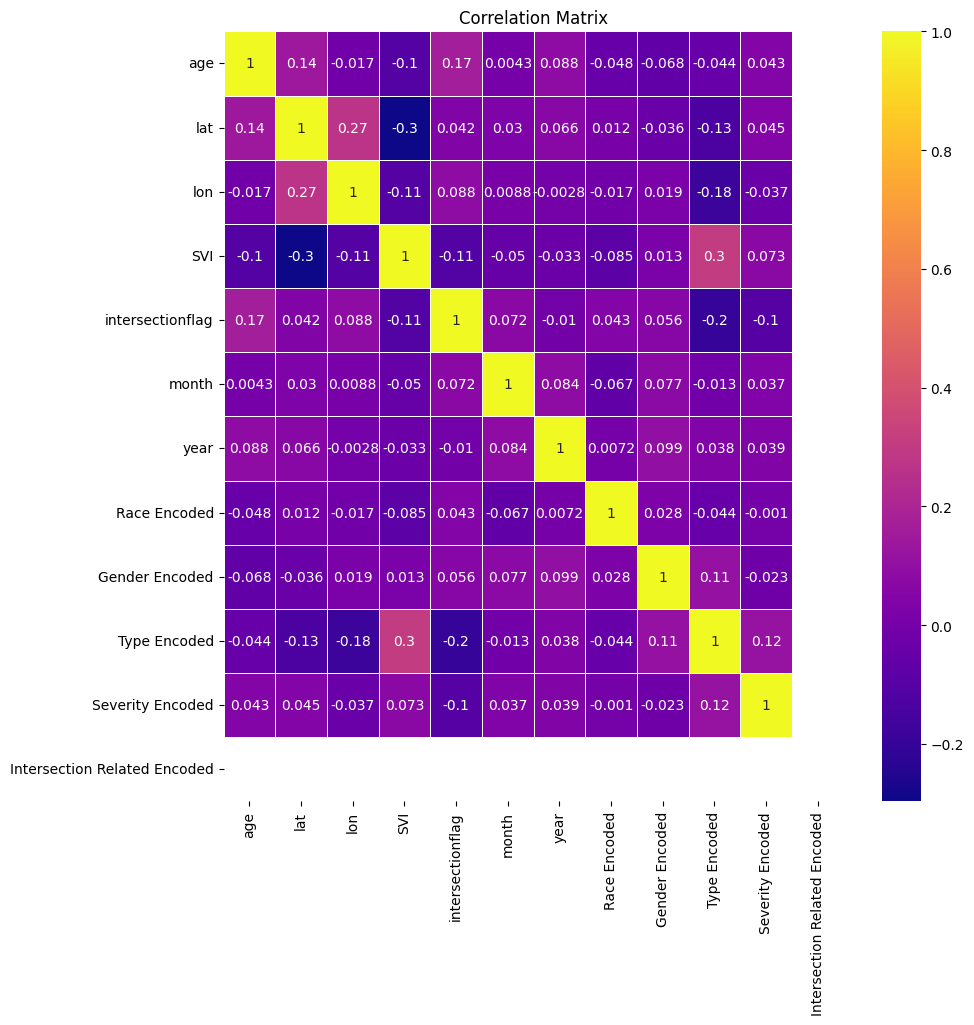

In [ ]:
#Correlation Matrix

correlation_matrix = df_copy.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px

# Define the color gradient
colors = ['#005566', '#007F7F', '#2CA5A5', '#57BABA', '#82D1D1', '#ADE8E8', '#D9FFFF']  # Original colors

# Bar plot of SVI by race
fig = px.bar(df, x='race', y='SVI', title='SVI by race', color='race', color_discrete_sequence=colors)
fig.update_layout(xaxis_title='Race', yaxis_title='SVI', xaxis_tickangle=-90)

fig.update_layout(
    font=dict(
        family='Courier New',
        size=12,
        color='black'
    )
)

fig.update_traces(marker_line_width=0)

fig.update_layout(height=700)

fig.show()


In [ ]:
import plotly.express as px

#Bar plot of SVI by race
fig = px.bar(df, x='race', y='SVI', title='SVI by race', color='race')
fig.update_layout(xaxis_title='Race', yaxis_title='SVI', xaxis_tickangle=-90, height = 700)
fig.show()

Using a bar chart allows us to see that the social vulnerability index (SVI) is highest for American indians/Alaskin Natives. The SVI is also very high for Hispanics and Blacks. Lastly the SVI is relatively low for Whites and Asians. This tells us that American indians/Alaskin Natives, Hispanics and Blacks communites are the most vulnerable to a hazardous environment

In [ ]:
import plotly.graph_objects as go

colors = ['#005566', '#007F7F', '#2CA5A5', '#57BABA', '#82D1D1', '#ADE8E8', '#D9FFFF']
severity_by_race = df_copy.groupby('Race Encoded')['Severity Encoded'].mean()

fig = go.Figure(data=[go.Bar(
    x=severity_by_race.index,
    y=severity_by_race.values,
    marker_color=colors
)])

fig.update_layout(
    title='Average Severity of Accidents by Race',
    xaxis=dict(
        title='Race Encoded',
        titlefont=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title='Average Severity Encoded',
        titlefont=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    font=dict(
        family='Courier New',
        size=12,
        color='black'
    )
)

fig.show()


In [ ]:
import plotly.graph_objects as go
severity_by_race = df_copy.groupby('Race Encoded')['Severity Encoded'].mean()

fig = go.Figure(data=[go.Bar(
    x=severity_by_race.index,
    y=severity_by_race.values,
    marker_color='skyblue'
)])


fig.update_layout(
    title='Average Severity of Accidents by Race',
    xaxis_title='Race Encoded',
    yaxis_title='Average Severity Encoded'
)

fig.show()

X_AXIS: race_encoded = {
    'H - HISPANIC': 0,
    'W - WHITE': 1,
    'B - BLACK': 2,
    'A - ASIAN': 3,
    '99 - UNKNOWN': 4,
    '98 - OTHER': 5,
    'I - AMER. INDIAN/ALASKAN NATIVE': 6
}

Y_AXIS: severity_encoded = {
    'B - SUSPECTED MINOR INJURY': 0,
    'A - SUSPECTED SERIOUS INJURY': 1,
    'K - FATAL INJURY': 2
}

This bar chart shows us the average severity level of an accident as determined by each race. It is created by averaging the the encoded values of the severity level of each accident for every race. This allows us to see that the race that was unknown (4) averaged accident levels that were closer to a serious suspected injury. It also tells us that Asians (3) were more likely to get into a minor suspected injury as the average is closer to 0 (suspected minor injury) than it is to 1 (suspected serious injury). This goes the same for the other races as well.

In [ ]:
import plotly.graph_objects as go

# Calculate severity by gender
severity_by_gender = df_copy.groupby('Gender Encoded')['Severity Encoded'].mean()

# Bar chart
colors = ['#005666', '#008080']


legend_labels = ['0 - Male', '1 - Female']

fig = go.Figure(data=[go.Bar(
    x=severity_by_gender.index,
    y=severity_by_gender.values,
    marker_color=colors,
)])


fig.update_layout(
    title='Gender vs Severity of Accidents',
    xaxis=dict(
        title='Gender Encoded',
        titlefont=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title='Average Severity Encoded',
        titlefont=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    font=dict(
        family='Courier New',
        size=12,
        color='black'
    )
)

#legend
for i, label in enumerate(legend_labels):
    fig.add_annotation(
        x=0.95, y=1.2 - 0.05 * i,
        xref='paper', yref='paper',
        text=label,
        showarrow=False,
        font=dict(
            family='Courier New',
            size=12,
            color='black'
        )
    )

fig.show()


Males=0,
Females=1

On average males (0) were more likely to get into a serious injury as compared to females (1).

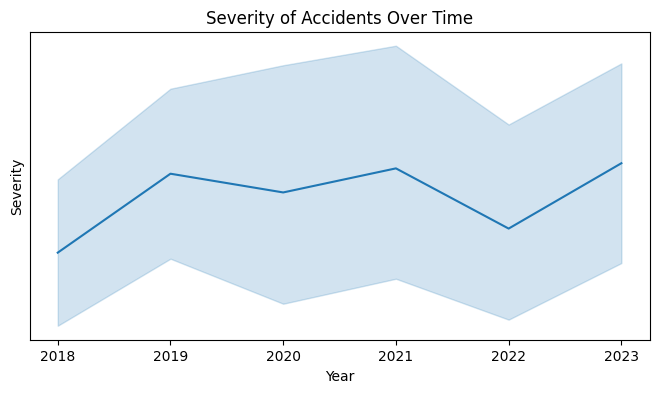

In [ ]:
#Line Graph

plt.figure(figsize=(8,4))
sns.lineplot(x='year', y='severity', data=df)
plt.title('Severity of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.show()

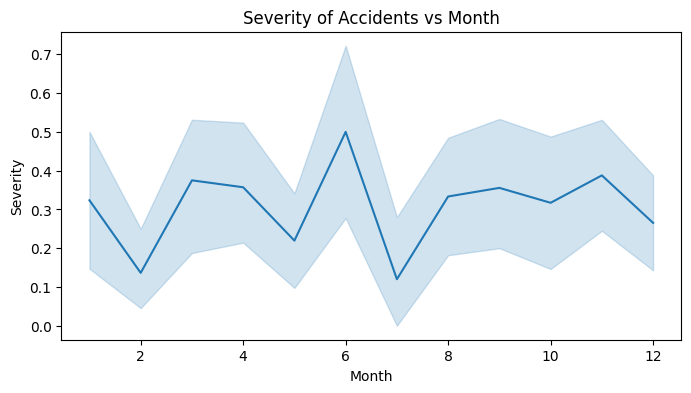

In [ ]:
#Line Graph

plt.figure(figsize=(8,4))
sns.lineplot(x='month', y='Severity Encoded', data=df_copy)
plt.title('Severity of Accidents vs Month')
plt.xlabel('Month')
plt.ylabel('Severity')
plt.show()

We can see that the severity of accidents tend to spike the highest in June. We can hypothesize that this is because more kids are out during walking or biking during the summer time.

In [ ]:
print(df_copy.columns)

Index(['age', 'lat', 'lon', 'SVI', 'intersectionflag', 'month', 'year',
       'Race Encoded', 'Gender Encoded', 'Type Encoded', 'Severity Encoded',
       'Intersection Related Encoded'],
      dtype='object')


In [ ]:
df_subset = df_copy[['Severity Encoded', 'Type Encoded']]

correlation = df_copy['Severity Encoded'].corr(df_copy['Type Encoded'])
print("Correlation coefficient between Severity Encoded and Type Encoded:", correlation)

Correlation coefficient between Severity Encoded and Type Encoded: 0.11649330829390195


There doesn't seem to be any significant correlation between the severity of the injury sustained and whether the pedestrian was walking, cycling, or using some other form of transport.

In [ ]:
import plotly.express as px

# Box plot of Age by Severity
# Values of Severity are encoded with 0 being a suspected minor injury and 2 being a fatal injury
fig = px.box(df, x='severity', y='age', color='severity', title='Box Plot of Severity by Age')

fig.update_layout(
    xaxis=dict(
        title_text='Severity',
        title_font=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title_text='Age',
        title_font=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    font=dict(
        family='Courier New',
        size=12,
        color='black'
    ),
    coloraxis_colorbar=dict(
        title='Severity',
        title_font=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    )
)

# Assigning colors to each box plot
fig.data[0].marker.color = 'teal'
fig.data[1].marker.color = 'rgb(135, 220, 220)''  ight teal)'
fig.data[2].marker.color = 'lightblue'


fig.show()


In [ ]:
#Box plot of Age by Severity
#Values of Severity are encoded with 0 being a suspected minor injury and 2 being a fatal injury
fig = px.box(df, x='severity', y='age', color='severity', title='Box Plot of Severity by Age')
fig.update_layout(xaxis_title='Severity', yaxis_title='Age')
fig.show()

The box plot shows us that the Interquartile Range (IQR) for the severity: K-Fatal Injury is more condesnsed indicating that the middle 50% is concentrated around the mean. This further suggests low variability in the data near the median, and suggests that fatal injuries typically involves individuals in a narrower age range. This also allows us to believe that it is more likely for young teens in the age range of around 11-16 to be in a accident that involves a fatal injury.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df_copy[['age', 'lat', 'lon', 'SVI', 'intersectionflag', 'month', 'year']]

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [ ]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
labels = kmeans.predict(X)

In [ ]:
df['Cluster'] = labels

In [ ]:
import plotly.express as px

X = df_copy[['lat', 'lon', 'Gender Encoded', 'age', 'Race Encoded']]

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels

fig = px.scatter(df_copy, x='lon', y='lat', color='lon',
                 size='age', hover_data=['Gender Encoded', 'age', 'Race Encoded'], title='Cluster Analysis',
                 labels={'lat': 'Latitude', 'lon': 'Longitude'},
                 color_continuous_scale=['teal', 'lightcyan'], height=900)

# Update layout with custom font settings
fig.update_layout(
    title_font=dict(
        family='Courier New',
        size=20,
        color='black'
    ),
    xaxis=dict(
        title_font=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title_font=dict(
            family='Courier New',
            size=18,
            color='black'
        ),
        tickfont=dict(
            family='Courier New',
            size=14,
            color='black'
        )
    ),
    font=dict(
        family='Courier New',
        size=12,
        color='black'
    )
)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#Cluster analysis to visualize demographic patterns

X = df_copy[['lat', 'lon', 'Gender Encoded', 'age', 'Race Encoded']]

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels

fig = px.scatter(df_copy, x='lon', y='lat', color='lon', symbol='Gender Encoded',
                 size='age', hover_data=['Gender Encoded', 'age', 'Race Encoded'], title='Cluster Analysis',
                 labels={'lat': 'Latitude', 'lon': 'Longitude'},
                 color_continuous_scale='viridis', height = 900)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Circles represent Male, Diamonds represent Female

Gender Encoded = 0 - Male,
Gender Encoded = 1 - Female

Race Encoded = 0 - HISPANIC,
Race Encoded = 1 - WHITE,
Race Encoded = 2 - BLACK,
Race Encoded = 3 - ASIAN,
Race Encoded = 4 - UNKNOWN,
Race Encoded = 5 - OTHER,
Race Encoded = 6 - AMER. INDIAN/ALASKAN NATIVE


Accident Hotspot:
There seems to be a higher density of accidents at coordinates (-95.6, 29.75), (-95.35, 29.75), (-95.12, 29.6), and (-95.2, 30.05). These help us to identify which geographical regions are most prone to accidents or where accidents happen most frequently.

In [ ]:
fig = px.scatter(df, x='lat', y='lon', color=labels, title='K-means Clustering',
                 labels={'lat': 'Latitude', 'lon': 'Longitude'}, color_continuous_scale='plasma')
fig.update_coloraxes(colorbar_title='Cluster')
fig.show()